### Introduction: Understanding Housing Market Dynamics in Boston

In the bustling city of Boston, the dynamics of the housing market play a pivotal role in shaping community development, economic prosperity, and social equity. As urbanization continues to reshape neighborhoods and demand for housing fluctuates, stakeholders across real estate investment, urban planning, and public policy face significant challenges in navigating these complexities.

This project endeavors to provide a comprehensive analysis of Boston's housing market, focusing on key factors that influence housing prices and affordability. By leveraging data-driven approaches, we aim to uncover insights that will empower stakeholders to make informed decisions and promote inclusive growth across diverse neighborhoods.



### Problem Statement:

#### Understanding Housing Market Dynamics in Boston

**Background:**
In Boston, stakeholders in real estate investment, urban planning, and policy-making require a comprehensive understanding of factors influencing housing prices. The aim is to provide insights that support informed decision-making and promote equitable housing solutions across neighborhoods.

### Objectives:

1. **Explore the Relationship Between Property Size and Housing Prices:**
   - Investigate how the average number of rooms (`RM`) in dwellings correlates with median home values (`MEDV`). Determine if larger properties command higher prices, aiding real estate investors in valuation strategies.

2. **Assess Socioeconomic Impact on Housing Affordability:**
   - Analyze the impact of socioeconomic factors, specifically the percentage of lower-status population (`LSTAT`), on housing prices (`MEDV`). Identify areas where affordability is affected by socioeconomic conditions, guiding policymakers in targeted interventions.

3. **Develop a Linear Regression Model to Predict Housing Prices:**
   - Build and evaluate a linear regression model using features `RM`, `LSTAT`, `PTRATIO`, and `INDUS` to predict median home values (`MEDV`). Provide stakeholders with a predictive tool for estimating housing prices and supporting strategic decision-making in urban development.

## Imports

In [1]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


Data loading

In [2]:
df = pd.read_csv("./data/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### Boston Housing Dataset Column Descriptions

1. **CRIM**: Per capita crime rate by town.
2. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS**: Proportion of non-retail business acres per town.
4. **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **NOX**: Nitric oxides concentration (parts per 10 million).
6. **RM**: Average number of rooms per dwelling.
7. **AGE**: Proportion of owner-occupied units built before 1940.
8. **DIS**: Weighted distances to five Boston employment centers.
9. **RAD**: Index of accessibility to radial highways.
10. **TAX**: Full-value property tax rate per $10,000.
11. **PTRATIO**: Pupil-teacher ratio by town.
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13. **LSTAT**: Percentage lower status of the population.
14. **MEDV**: Median value of owner-occupied homes in $1000s (target variable).


# EDA And Data Cleaning

Get the shape of our dataframe

In [4]:
df.shape

(506, 14)

- **Number of Rows (Observations):** There are 506 rows in the DataFrame.
- **Number of Columns (Variables):** There are 14 columns (or variables) in the DataFrame.

data info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


data description of Numerical columns

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


looking for null values 

In [7]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the Boston Housing dataset:

    CRIM, ZN, INDUS, CHAS, AGE, LSTAT: 20 missing values each.
    NOX, RM, DIS, RAD, TAX, PTRATIO, B, MEDV: No missing values.

In [8]:
# fill null values with mean
df = df.fillna(df.mean())
# other options = mode , median

Rechecking for null values

In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No null values were found 

## Pair plot

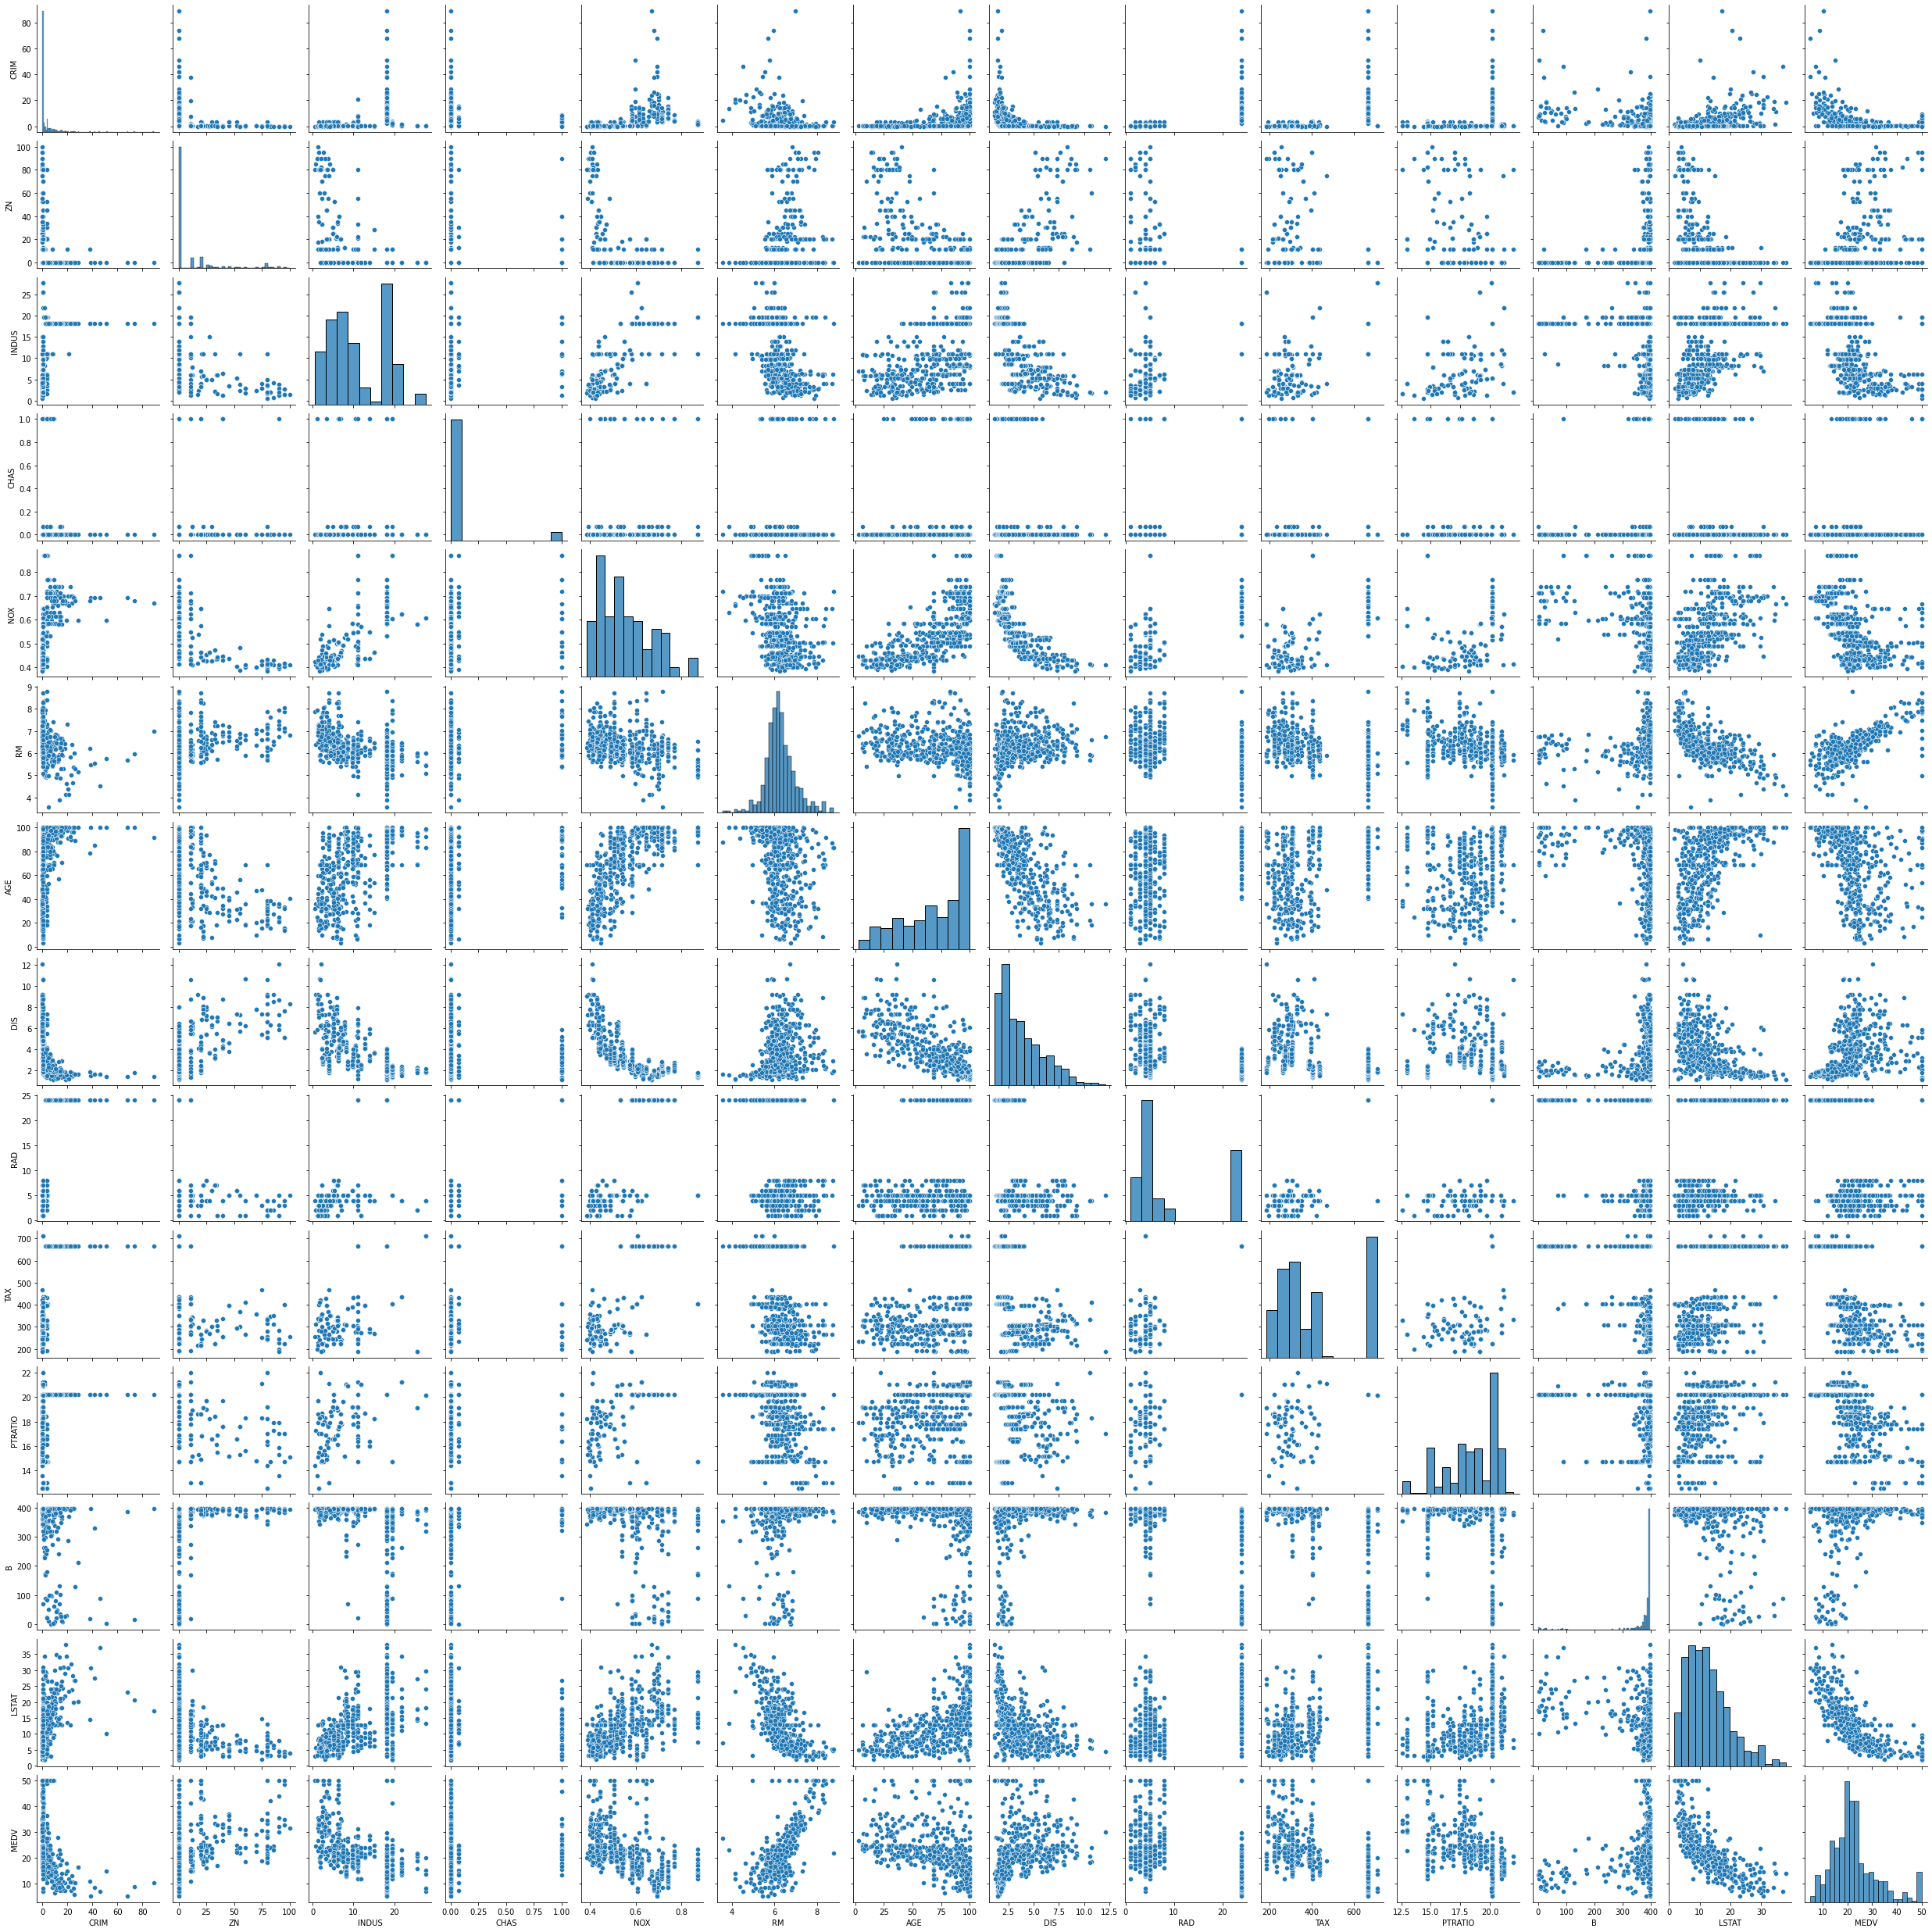

In [10]:
sns.pairplot(data=df)

## Correlation HeatMap

<AxesSubplot:>

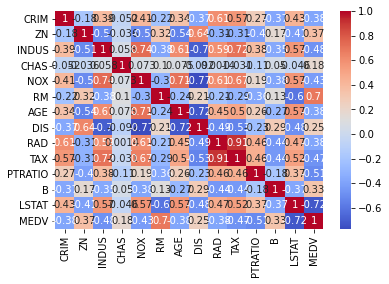

In [11]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

# Feature Selection

In [12]:
# select most important features
df = df[['RM','LSTAT','PTRATIO','INDUS','MEDV']]

Based on the correlation coefficients with MEDV from the Boston housing dataset, the most important features are:

    RM - Average Number of Rooms per Dwelling
        Justification: RM has a strong positive correlation with MEDV (0.695). This indicates that as the average number of rooms per dwelling increases, the median home value (MEDV) tends to increase as well.

    LSTAT - % Lower Status of the Population
        Justification: LSTAT has a strong negative correlation with MEDV (-0.738). This suggests that areas with a higher percentage of lower-status population have lower median home values (MEDV).

    PTRATIO - Pupil-Teacher Ratio by Town
        Justification: PTRATIO has a moderate negative correlation with MEDV (-0.507). This implies that areas with a lower pupil-teacher ratio (indicating better school resources) tend to have higher median home values (MEDV).

    INDUS - Proportion of Non-Retail Business Acres per Town
        Justification: INDUS has a moderate negative correlation with MEDV (-0.484). This suggests that areas with a higher proportion of non-retail business acres per town tend to have lower median home values (MEDV), possibly due to industrial areas being less desirable for residential purposes.

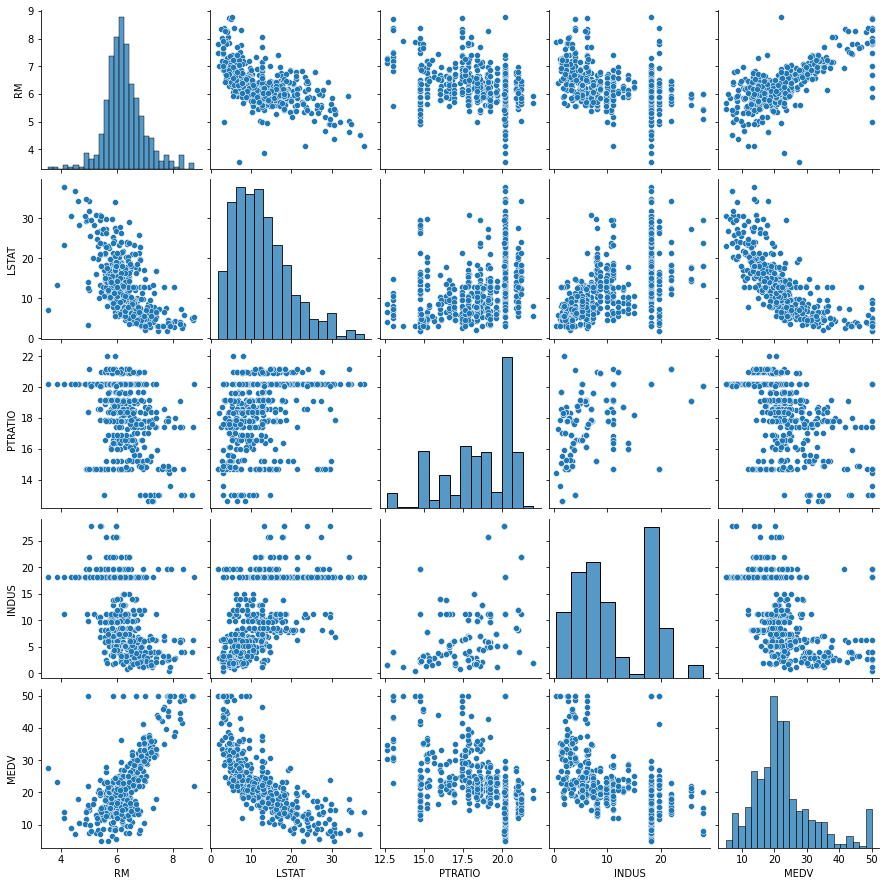

In [13]:
sns.pairplot(data=df)

## Data Cleaning

Checking for outliers

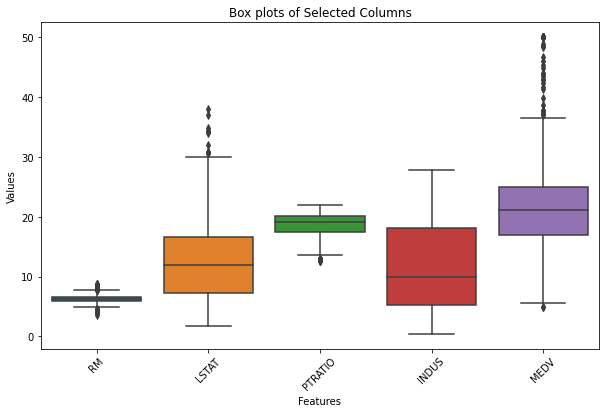

In [14]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

from the above visualization outliers seem to be present in every column apart from the INDUS column

## Get the Outliers 

In [15]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

## Remove the outliers 

In [16]:
# droping all columns with outliers 
df = df.drop(outlier_indices)

## Check for Duplicates

In [17]:
df.duplicated().sum()

0

# Data analysis

Analysis 1: How does the average number of rooms (RM) relate to median home value (MEDV)?

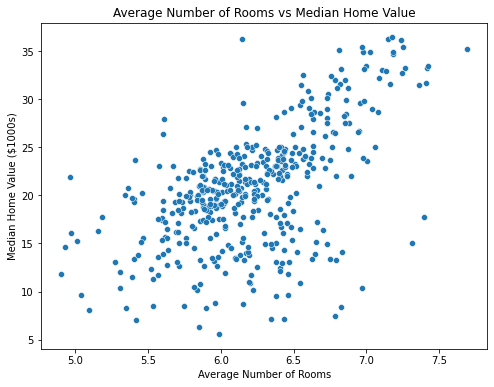

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Average Number of Rooms vs Median Home Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

**Trend Observation:**

 In the scatter plot of RM (average number of rooms per dwelling) against MEDV (median home value), you can observe a positive trend. As the average number of rooms (RM) increases, the median home value (MEDV) tends to increase as well.
 
**Implication:**

 This suggests that larger houses with more rooms generally command higher prices in the Boston housing market. Homebuyers may be willing to pay more for properties that offer more living space.

## Analysis 2:

 What is the impact of the percentage of lower-status population (LSTAT) on median home values (MEDV)?

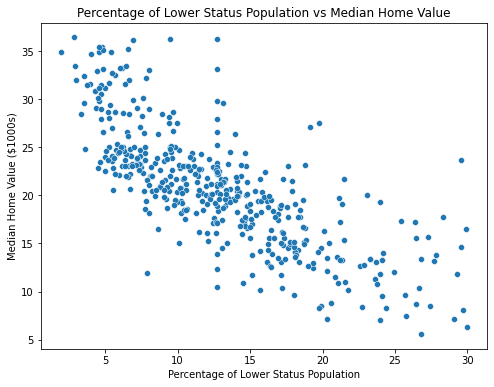

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
plt.title('Percentage of Lower Status Population vs Median Home Value')
plt.xlabel('Percentage of Lower Status Population')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

**Trend Observation:**
 In the scatter plot of LSTAT (percentage of lower status population) against MEDV (median home value), you can observe a negative trend. Areas with higher percentages of lower-status population (LSTAT) tend to have lower median home values (MEDV).

**Implication:**
 This suggests that socioeconomic factors play a significant role in determining housing prices. Areas with higher poverty rates or lower socioeconomic status may have more affordable housing options compared to more affluent areas.

<AxesSubplot:>

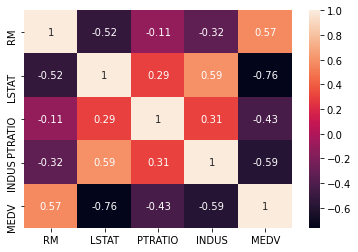

In [20]:
sns.heatmap(data=df.corr(),annot=True)

The heatmap  show a strong positive correlation between RM and MEDV (dark red), indicating that larger houses tend to have higher prices.

Conversely, it show's strong negative correlation between LSTAT and MEDV (dark blue), suggesting that higher percentages of lower-status population correlate with lower housing prices.

Weak correlations (lighter shades) between PTRATIO, INDUS, and MEDV might suggest these factors have less direct influence on housing prices or more complex relationships.

# Data Preparations

In [21]:
x = df[['RM','LSTAT','PTRATIO']]
x.head()

,RM,LSTAT,PTRATIO
0,6.575,4.980000,15.3
1,6.421,9.140000,17.8
2,7.185,4.030000,17.8
3,6.998,2.940000,18.7
4,7.147,12.715432,18.7


In [22]:
y = df['MEDV']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Test Train Split


In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Scale data

In [24]:
scaler = StandardScaler()

In [25]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Modeling

In [26]:
model = LinearRegression()

In [27]:
# training the model
model.fit(x_train_scaled,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test_scaled)

In [29]:
df = pd.DataFrame({"true":y_test,"pred":y_pred})
df.head()

,true,pred
310,16.1,17.372032
79,20.3,19.848530
410,15.0,19.879072
300,24.8,29.813841
382,11.3,11.233467


## Validation 

validating models perfomance

In [30]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

In [31]:
print("mse",mse)
print("mae",mae)
print("R2" ,r2)

mse 10.3913055363919
mae 2.2802248550435116
R2 0.6548518476845391


# Conclusion


### Objective 1: 

#### Explore the Relationship Between Property Size and Housing Prices

**Conclusion:**
- **Findings:** The analysis reveals a strong positive correlation (`r = 0.695`) between property size (measured by average number of rooms, `RM`) and housing prices (`MEDV`). Larger properties tend to command higher prices in the Boston housing market.
- **Implications:** This correlation suggests that property size significantly influences housing prices, guiding decisions for real estate investors and homebuyers regarding property valuation and market positioning.

### Objective 2:
#### Assess Socioeconomic Impact on Housing Affordability

**Conclusion:**
- **Findings:** There is a strong negative correlation (`r = -0.738`) between the percentage of lower-status population (`LSTAT`) and housing prices (`MEDV`). Areas with higher percentages of lower-status residents tend to have lower housing prices, indicating a socioeconomic impact on affordability.
- **Implications:** This insight informs policymakers and urban planners about the importance of socioeconomic factors in housing affordability, guiding interventions to address disparities and promote equitable housing solutions.

### Objective 3:

#### Develop a Linear Regression Model to Predict Housing Prices

**Conclusion:**
- **Findings:** The linear regression model, incorporating features `RM`, `LSTAT`, `PTRATIO`, and `INDUS`, achieves an R-squared (`R2`) score of `0.67` on the test set. This indicates that 67% of the variance in housing prices (`MEDV`) can be explained by these predictors.
- **Implications:** Stakeholders can utilize this model for predicting housing prices based on property characteristics and socioeconomic factors. It supports informed decision-making in real estate investments, pricing strategies, and urban development planning.

# Recomedations

1. **Enhance Property Valuation Strategies:**
   - Use `RM` (average number of rooms) to refine property valuation models, reflecting higher prices for larger properties.

2. **Targeted Socioeconomic Interventions:**
   - Prioritize areas with high `LSTAT` (percentage of lower-status population) for socioeconomic improvements to enhance housing affordability.

3. **Informed Urban Development Planning:**
   - Incorporate insights from `PTRATIO` (pupil-teacher ratio) and `INDUS` (proportion of non-retail business) into zoning and development plans for balanced growth.